In [1]:
import seaborn as sb
import pandas as pd

In [53]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

def count_outlier(df_in,col_name):
  new_count = 0
  old_count = 0
  new_col = remove_outlier(df_in,col_name)
  for i in range(len(new_col)):
    new_count = new_count+1
  for i in range(len(df_in)):
    old_count = old_count+1
  outlier = old_count - new_count
  return outlier


# Problem 1

69


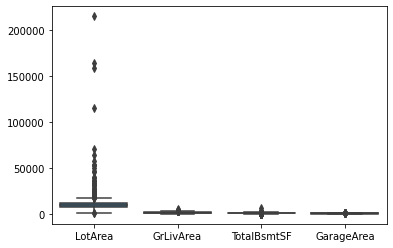

In [161]:
data_pd = pd.read_csv("train.csv")

new_pd = data_pd[['LotArea','GrLivArea','TotalBsmtSF','GarageArea']]
sp_pd = data_pd[['LotArea','GrLivArea','TotalBsmtSF','GarageArea','SalePrice']]
sale_price= data_pd['SalePrice']

sb.boxplot(data=new_pd)

lotarea_outlier = count_outlier(new_pd,"LotArea")
print(lotarea_outlier)
#1a) Lot Area has the max no. of outliers. 69 Outliers


In [106]:
removed_outlier_LA = remove_outlier(sp_pd,"LotArea")
removed_outlier_GLA = remove_outlier(removed_outlier_LA,"GrLivArea")
removed_outlier_SF = remove_outlier(removed_outlier_GLA,"TotalBsmtSF")
removed_outlier_GA = remove_outlier(removed_outlier_SF,"GarageArea")
removed_outlier_all = remove_outlier(removed_outlier_GA,"SalePrice")
#removed_outlier_GA.skew(axis=0,skipna=True)
new_pd.skew(axis=0,skipna=True)
#1b)Lot Area is most skewed. Positive skewed. (Longer tai on right)

###########
#sb1 = sb.boxplot(data=removed_outlier_all['LotArea'])
#sb2 = sb.boxplot(data=removed_outlier_all['GrLivArea'])
#sb3 = sb.boxplot(data=removed_outlier_all['TotalBsmtSF'])
#sb4 = sb.boxplot(data=removed_outlier_all['GarageArea'])
#sb5 = sb.boxplot(data=removed_outlier_all['SalePrice'])


LotArea        12.207688
GrLivArea       1.366560
TotalBsmtSF     1.524255
GarageArea      0.179981
dtype: float64

In [179]:
#print(removed_outlier_GA.corr())
print(sp_pd.corr())
#sb.heatmap(sp_pd.corr())
#1c)GRLivArea and GarageArea

#sb.jointplot(removed_outlier_GA.index,removed_outlier_GA['SalePrice'].values,removed_outlier_GA['LotArea'].values)

              LotArea  GrLivArea  TotalBsmtSF  GarageArea  SalePrice
LotArea      1.000000   0.263116     0.260833    0.180403   0.263843
GrLivArea    0.263116   1.000000     0.454868    0.468997   0.708624
TotalBsmtSF  0.260833   0.454868     1.000000    0.486665   0.613581
GarageArea   0.180403   0.468997     0.486665    1.000000   0.623431
SalePrice    0.263843   0.708624     0.613581    0.623431   1.000000


# Problem 2

In [137]:
p2_pd = data_pd[['MSSubClass','Neighborhood','BldgType','OverallQual','SalePrice']]
mssub_count = p2_pd['MSSubClass'].unique().size
nbor_count = p2_pd['Neighborhood'].unique().size
bdg_count = p2_pd['BldgType'].unique().size
ovql_count = p2_pd['OverallQual'].unique().size
print(mssub_count,nbor_count,bdg_count,ovql_count)
#2a)Neighborhood has the highest levels

15 25 5 10


In [133]:
print("MSSubClass Levels:\n", p2_pd['MSSubClass'].value_counts())
print("\nNeighborhood Levels:\n", p2_pd['Neighborhood'].value_counts())
print("\nBldgType:\n", p2_pd['BldgType'].value_counts())
print("\nOverallQual Levels:\n", p2_pd['OverallQual'].value_counts())


MSSubClass Levels:
 20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

Neighborhood Levels:
 NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

BldgType:
 1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

OverallQual Levels:
 5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64


For OverallQual, can find correlation simply by .corr()

             MSSubClass  OverallQual  SalePrice
MSSubClass     1.000000     0.032628  -0.084284
OverallQual    0.032628     1.000000   0.790982
SalePrice     -0.084284     0.790982   1.000000


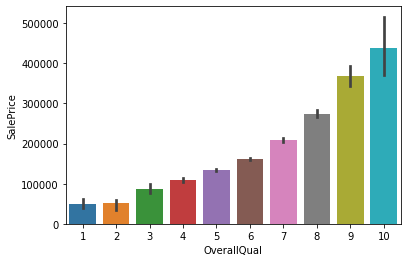

In [173]:
print(p2_pd.corr())
sb.barplot(data=p2_pd,x="OverallQual",y="SalePrice")

**Building Type**

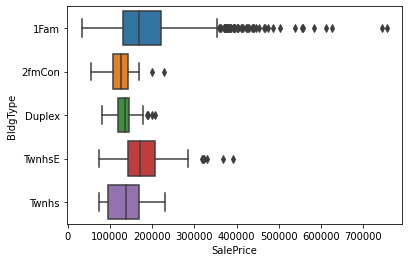

In [143]:
sb.boxplot(data=p2_pd,x="SalePrice",y="BldgType")

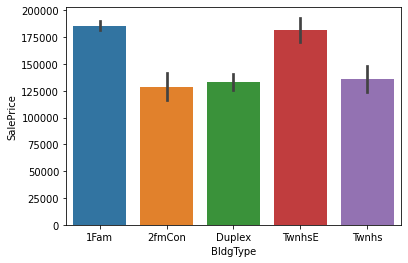

In [156]:
sb.barplot(data=p2_pd,x="BldgType",y="SalePrice")

**Neighbourhood**

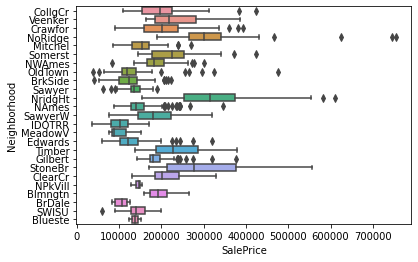

In [141]:
sb.boxplot(data=p2_pd,x="SalePrice",y="Neighborhood")

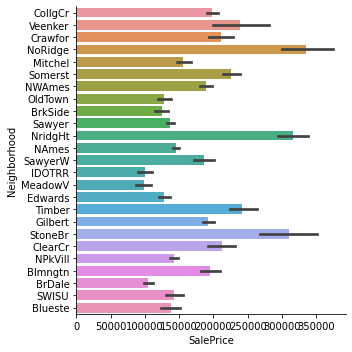

In [163]:
sb.catplot(data=p2_pd,x="SalePrice",y="Neighborhood",kind="bar")

**MSSubClass**

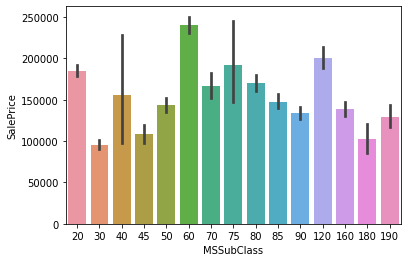

In [150]:
sb.barplot(data=p2_pd,x="MSSubClass",y="SalePrice")

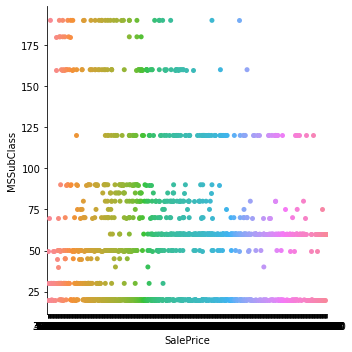

In [154]:
sb.catplot(data=p2_pd,x="SalePrice",y="MSSubClass")

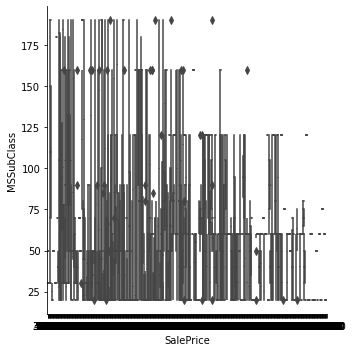

# Problem 3
**Remodeled**


***********************

From the first boxplot, it is obvious that in general, remodelling recently increases the sale price of the house. Increase in Median and Mean is observed. An increase in median means in general, the data set is increasing altogether.

**In conclusion, remodelling recently increases the Sale Price of the house**

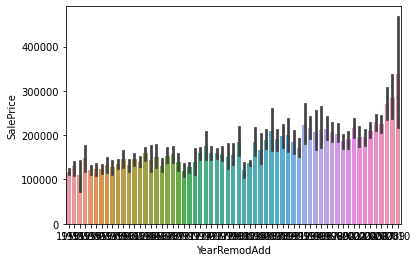

In [252]:
pd_remod = data_pd[['YearRemodAdd','SalePrice']]
print(pd_remod.corr())
sb.barplot(data=pd_remod,x="YearRemodAdd",y="SalePrice",orient='v')

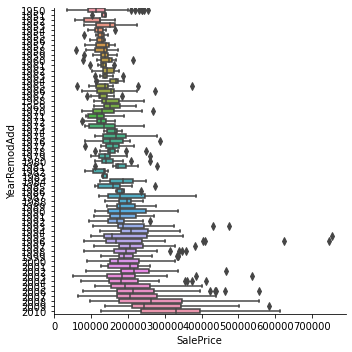

In [251]:
sb.catplot(data=pd_remod,y="YearRemodAdd",x="SalePrice",kind="box",orient='h')

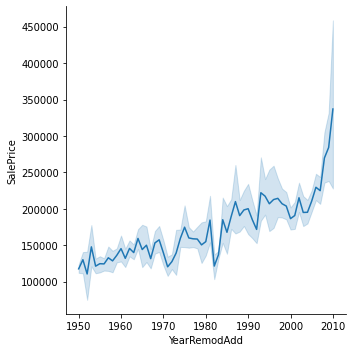

In [247]:
sb.relplot(data=pd_remod, x="YearRemodAdd", y="SalePrice", kind="line")

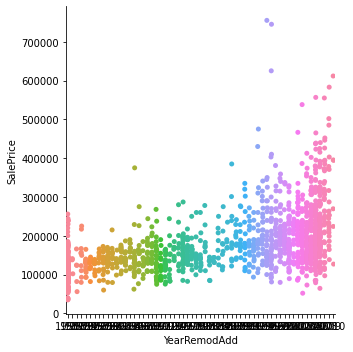

In [233]:
sb.catplot(data=pd_remod,x="YearRemodAdd",y="SalePrice")

In [237]:
pd_q3 = pd.DataFrame()
for x in range(len(data_pd)):
  iloc_data = data_pd.iloc[x]
  if (iloc_data['YearBuilt'] == iloc_data['YearRemodAdd']):
    pd_q3 = pd_q3.append({'Remodded':0,'SalePrice':iloc_data['SalePrice']},ignore_index=True)
  else:
    pd_q3 = pd_q3.append({'Remodded':1,'SalePrice':iloc_data['SalePrice']},ignore_index=True)

#print(pd_q3)



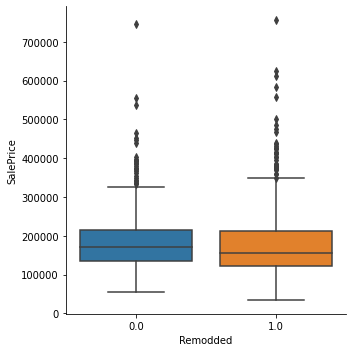

In [224]:
sb.catplot(data=pd_q3,x="Remodded",y="SalePrice",kind="box")